In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline#for encoding
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

# Instantiate model with 1000 decision trees


UsageError: unrecognized arguments: encoding


In [30]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('new.csv')
features.head(7)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,14.82,114,132.09,19,228,83,Medium,28,19,Yes,Yes
1,11.85,130,108.36,8,529,90,Good,65,18,Yes,No
2,8.51,118,96.00,17,205,98,Medium,48,18,Yes,No
3,11.94,149,127.68,4,358,95,Medium,38,18,No,Yes
4,13.86,107,86.87,18,426,85,Good,39,19,Yes,Yes
5,6.19,126,106.47,10,377,132,Medium,72,18,Yes,No
6,11.14,148,104.97,17,556,101,Bad,88,18,Yes,Yes


In [31]:
#getting information of dataset
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    float64
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 34.5+ KB


In [32]:
print('The shape of our features is:', features.shape)

The shape of our features is: (400, 11)


In [33]:
features.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

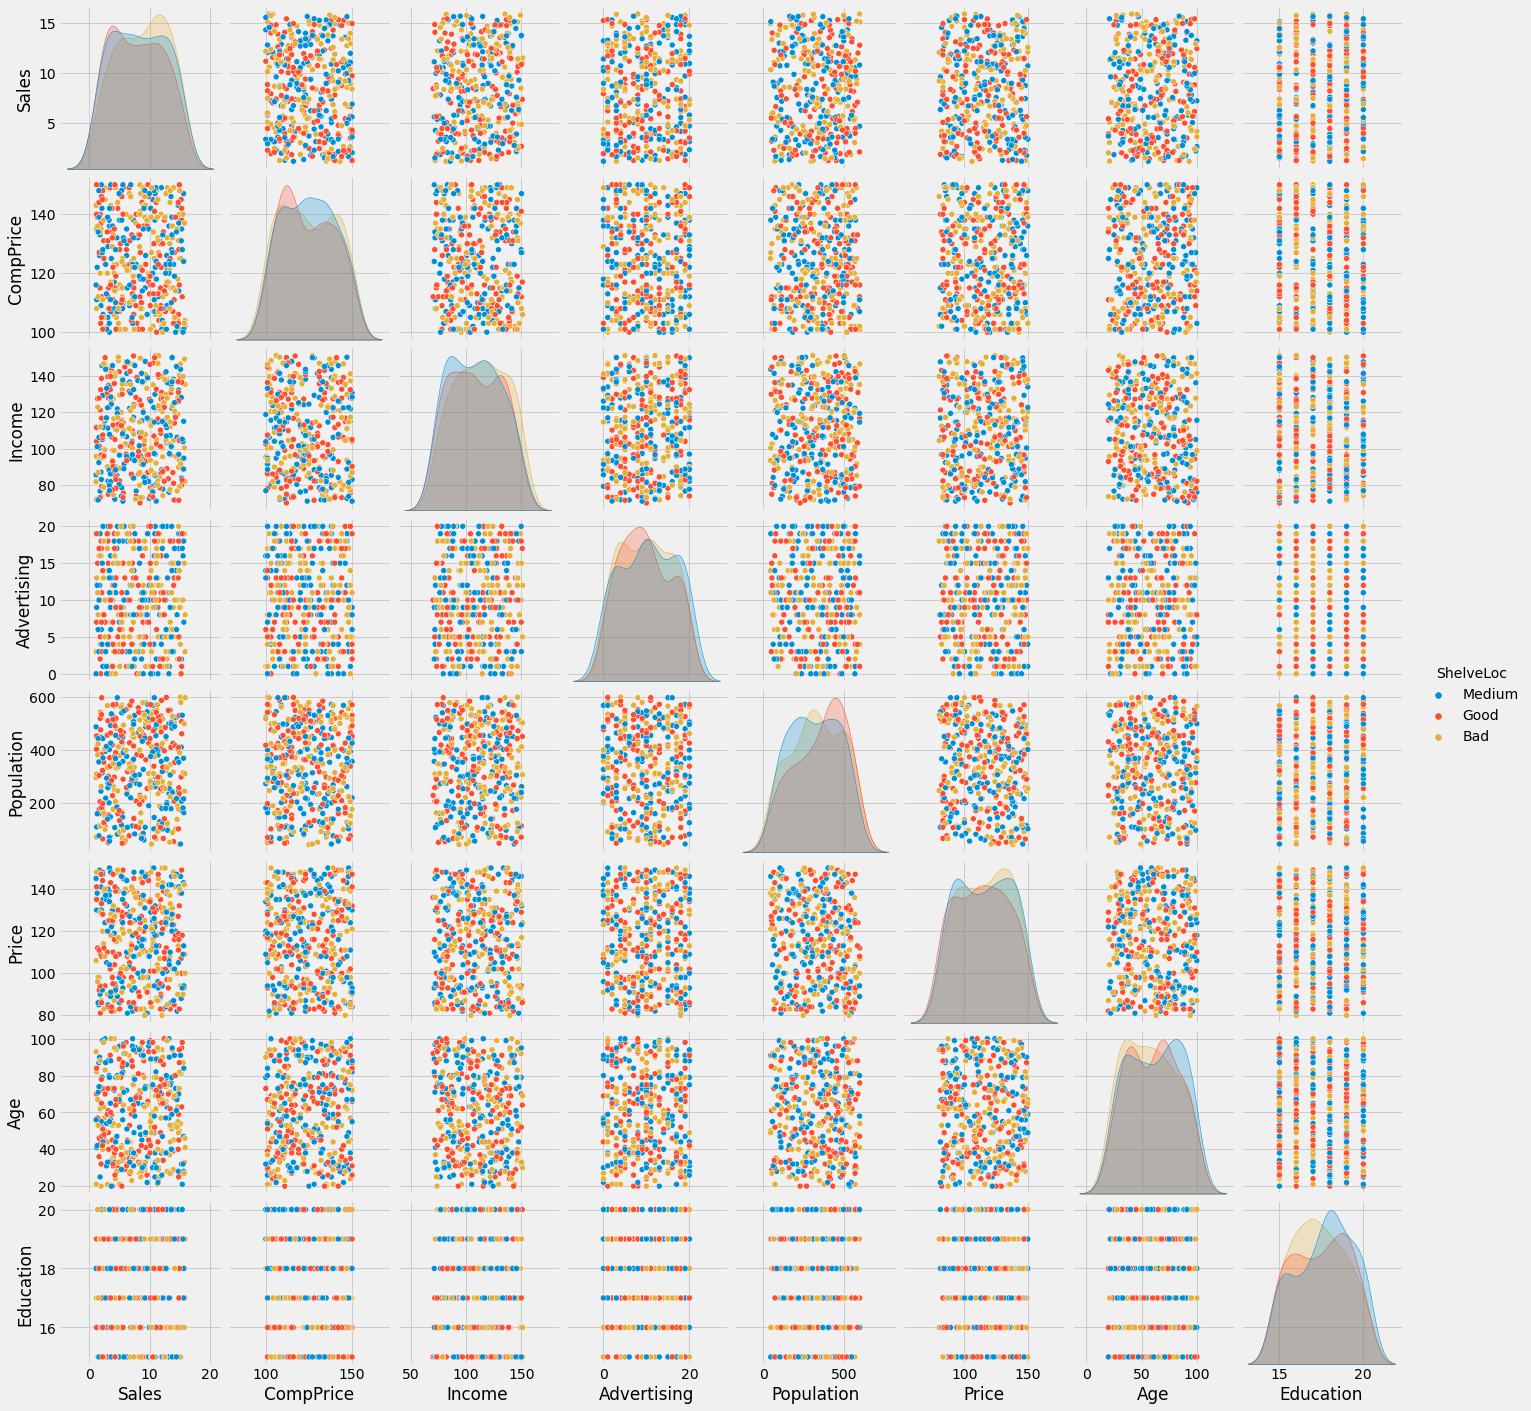

In [34]:
sns.pairplot(data=features, hue = 'ShelveLoc')

In [35]:
df=pd.get_dummies(features,columns=['Urban','US'], drop_first=True)

In [36]:
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0  14.82        114  132.09           19         228     83    Medium   28   
1  11.85        130  108.36            8         529     90      Good   65   
2   8.51        118   96.00           17         205     98    Medium   48   
3  11.94        149  127.68            4         358     95    Medium   38   
4  13.86        107   86.87           18         426     85      Good   39   

   Education  Urban_Yes  US_Yes  
0         19          1       1  
1         18          1       0  
2         18          1       0  
3         18          0       1  
4         19          1       1  


In [37]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [38]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0  14.82        114  132.09           19         228     83          2   28   
1  11.85        130  108.36            8         529     90          1   65   
2   8.51        118   96.00           17         205     98          2   48   
3  11.94        149  127.68            4         358     95          2   38   
4  13.86        107   86.87           18         426     85          1   39   

   Education  Urban_Yes  US_Yes  
0         19          1       1  
1         18          1       0  
2         18          1       0  
3         18          0       1  
4         19          1       1  


In [12]:
x=df.iloc[:,0:6]
y=df['ShelveLoc']
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,14.82,114,132.09,19,228,83
1,11.85,130,108.36,8,529,90
2,8.51,118,96.00,17,205,98
3,11.94,149,127.68,4,358,95
4,13.86,107,86.87,18,426,85
...,...,...,...,...,...,...
395,2.71,123,143.44,3,220,137
396,7.34,132,132.35,8,366,108
397,2.23,101,107.45,14,199,128
398,10.30,127,100.33,11,47,121


In [13]:
y

0      2
1      1
2      2
3      2
4      1
      ..
395    2
396    2
397    1
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [39]:
df['ShelveLoc'].unique()

array([2, 1, 3])

In [40]:
df.ShelveLoc.value_counts()

2    137
3    135
1    128
Name: ShelveLoc, dtype: int64

In [41]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [42]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,8.346400,124.412500,109.911400,9.997500,333.620000,115.33000,2.01750,59.960000,17.507500,0.520000,0.517500
std,4.276546,15.082142,23.000928,5.993103,155.417993,20.50591,0.81169,23.113177,1.629903,0.500226,0.500319
min,1.110000,100.000000,70.230000,0.000000,45.000000,80.00000,1.00000,20.000000,15.000000,0.000000,0.000000
25%,4.462500,111.000000,89.150000,5.000000,207.750000,97.00000,1.00000,39.750000,16.000000,0.000000,0.000000
50%,8.425000,123.000000,110.025000,10.000000,340.000000,116.00000,2.00000,60.500000,18.000000,1.000000,1.000000
75%,11.982500,138.000000,129.227500,15.000000,465.500000,133.00000,3.00000,79.000000,19.000000,1.000000,1.000000
max,15.890000,150.000000,150.970000,20.000000,600.000000,150.00000,3.00000,100.000000,20.000000,1.000000,1.000000


In [18]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,14.82,114,132.09,19,228,83,2,28,19,1,1
1,11.85,130,108.36,8,529,90,1,65,18,1,0
2,8.51,118,96.00,17,205,98,2,48,18,1,0
3,11.94,149,127.68,4,358,95,2,38,18,0,1
4,13.86,107,86.87,18,426,85,1,39,19,1,1


In [44]:

labels = np.array(df['Income'])

features= df.drop('Income', axis = 1)
feature_list = list(df.columns)
features = np.array(df)

In [46]:

from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (300, 11)
Training Labels Shape: (300,)
Testing Features Shape: (100, 11)
Testing Labels Shape: (100,)


In [47]:

baseline_preds = test_features[:, feature_list.index('Sales')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  104.98


In [52]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [53]:
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.24 degrees.


In [54]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.77 %.


In [55]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [56]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Income               Importance: 1.0
Variable: Sales                Importance: 0.0
Variable: CompPrice            Importance: 0.0
Variable: Advertising          Importance: 0.0
Variable: Population           Importance: 0.0
Variable: Price                Importance: 0.0
Variable: ShelveLoc            Importance: 0.0
Variable: Age                  Importance: 0.0
Variable: Education            Importance: 0.0
Variable: Urban_Yes            Importance: 0.0
Variable: US_Yes               Importance: 0.0


In [57]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('Sales'), feature_list.index('Income')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.19 degrees.
Accuracy: 99.81 %.


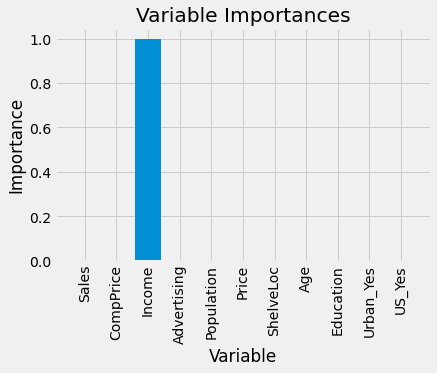

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## 